<a href="https://colab.research.google.com/github/ShishirG1/MAE-5020-31227_DDAE/blob/main/HW_3_DMD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Define the functions
def f1(xx, tt):
    y_1 = 2 * np.cos(xx) * np.exp(1j * tt)
    return y_1

def f2(xx, tt):
    y_2 = np.sin(xx) * np.exp(3j * tt)
    return y_2

In [ ]:
#Define time and space discretizations
xi = np.linspace(-10, 10, 400)
t = np.linspace(0, 4*np.pi, 201)
dt = t[1] - t[0]
xx, tt = np.meshgrid(xi, t)
X = f1(xx, tt) + f2(xx, tt)

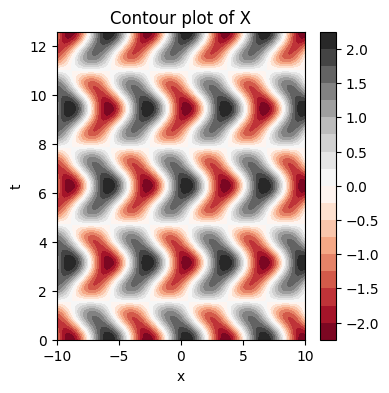

In [ ]:
plt.figure(figsize=(4, 4))
plt.contourf(xx, tt, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')
plt.show()


In [ ]:
X_1 = X.T[:, :-1]
X_2 = X.T[:, 1:]

print(X.shape, X_1.shape, X_2.shape)

(201, 400) (400, 200) (400, 200)


In [ ]:
# Step 1 - SVD
U, Sigma, V = np.linalg.svd(X_1,full_matrices=False)
print(U.shape,Sigma.shape, V.shape)


(400, 200) (200,) (200, 200)


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


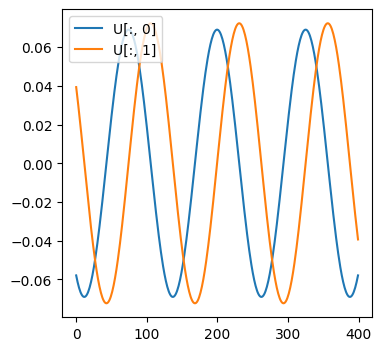

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(U[:, 0], label='U[:, 0]')
plt.plot(U[:, 1], label='U[:, 1]')
plt.legend(loc='upper left')
plt.show()


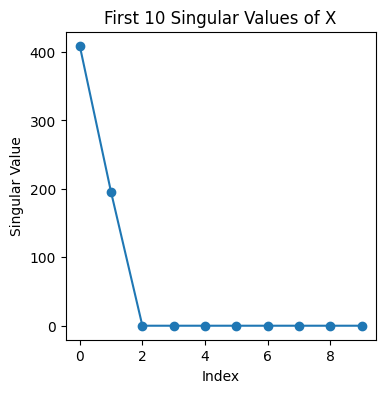

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(Sigma[:10], 'o-')
plt.xlabel('Index')
plt.ylabel('Singular Value')
plt.title('First 10 Singular Values of X')
plt.show()

In [ ]:
print (Sigma[:2])


[409.19730369 195.29309169]


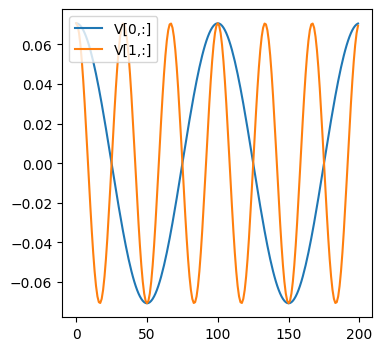

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(V[0,:], label='V[0,:]')
plt.plot(V[1,:], label='V[1,:]')
#plt.plot(V[2,:], label='V[2,:]')
#plt.plot(V[3,:], label='V[3,:]')
plt.legend(loc='upper left')
plt.show()

**Take only the first two modes**

In [ ]:
U, Sigma, V = U[:, :2], Sigma[:2], V[:2, :]

print(U.shape, np.diag(Sigma).shape, V.shape)

(400, 2) (2, 2) (2, 200)


In [ ]:
A_tilde = (U.conj().T @ X_2 @ V.conj().T @ np.linalg.inv(np.diag(Sigma)))
Lambda, W = np.linalg.eig(A_tilde)

In [ ]:
Phi = (X_2 @ V.conj().T @ np.linalg.inv(np.diag(Sigma)) @ W)


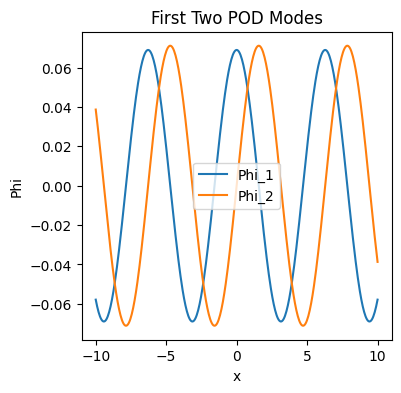

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(xi, Phi[:, 0], '-', label='Phi_1')
plt.plot(xi, Phi[:, 1], '-', label='Phi_2')
plt.xlabel('x')
plt.ylabel('Phi')
plt.legend()
plt.title('First Two POD Modes')
plt.show()

In [ ]:
b = np.linalg.lstsq(Phi, X_1[:,0], rcond=None)[0]

In [ ]:
Omega = np.log(Lambda)/dt


In [ ]:
print(Omega)


[-7.06193927e-15+1.j  3.67836766e-15+3.j]


In [ ]:
t_exp = np.arange(X.T.shape[1]) * dt
temp = np.repeat(Omega.reshape(-1,1), t_exp.size, axis=1)
dynamics = np.exp(temp * t_exp) * b.reshape(2, -1)

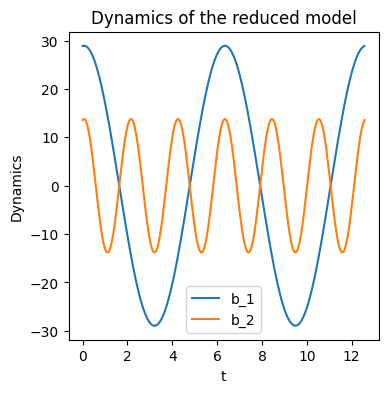

In [ ]:
plt.figure(figsize=(4, 4))
plt.plot(t_exp, dynamics[0, :], '-', label='b_1')
plt.plot(t_exp, dynamics[1, :], '-', label='b_2')
plt.xlabel('t')
plt.ylabel('Dynamics')
plt.legend()
plt.title('Dynamics of the reduced model')
plt.show()


In [ ]:
X_dmd = Phi @ dynamics


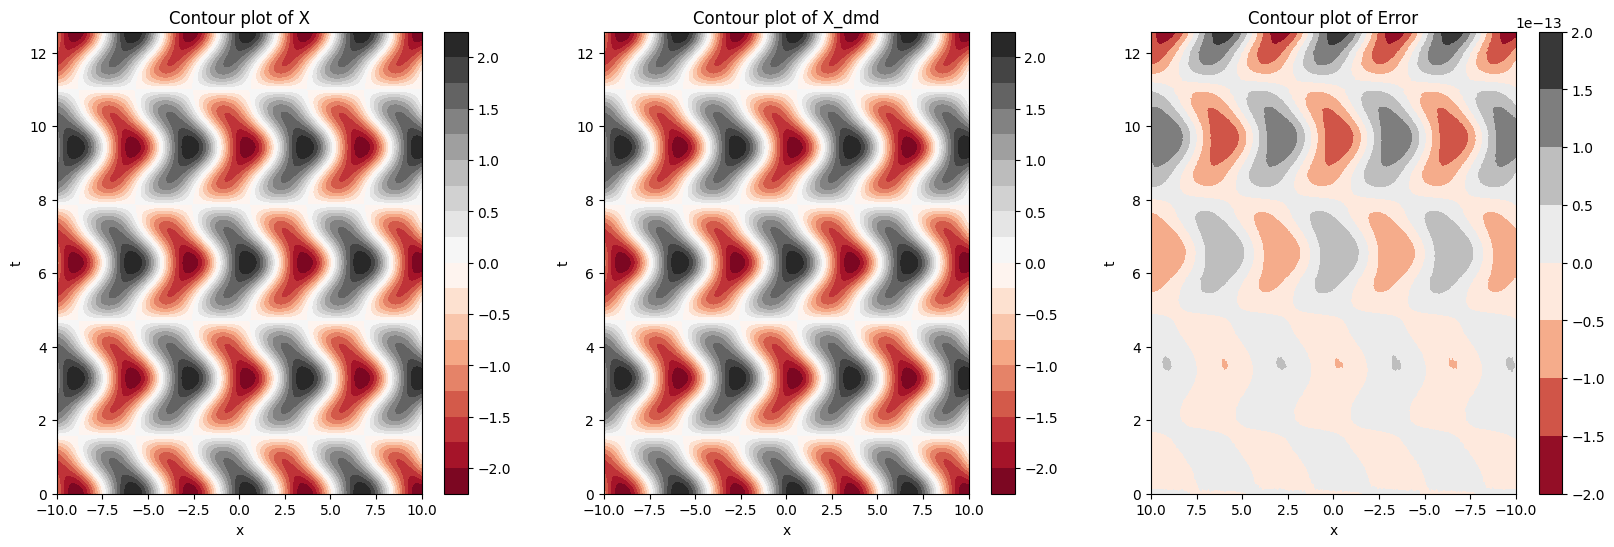

In [ ]:
plt.figure(figsize= (20, 6))
plt.subplot(1, 3, 1)
plt.contourf(xx, tt, np.real(X), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X')

plt.subplot(1, 3, 2)
plt.contourf(xx, tt, np.real(X_dmd.T), 20, cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of X_dmd')

X_diff = ((np.real(X)) - np.real(X_dmd.T))
plt.subplot(1, 3, 3)
plt.contourf(xx, tt, np.real(X_diff) , cmap='RdGy')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title('Contour plot of Error')
plt.gca().invert_xaxis()

plt.show()